In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\data\Bank_churn_modelling.csv")

In [18]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
#Binary Attributes

In [20]:
df1=df[['''HasCrCard','IsActiveMember','Exited']]
df1

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-20-9dbdc5202d17>, line 2)

In [21]:
df1.head()

,HasCrCard,IsActiveMember,Exited
0,1,1,1
1,0,1,0
2,1,0,1
3,0,0,0
4,1,1,0


In [22]:
x=np.array(df1[['IsActiveMember','Exited']])
x=x.reshape(-1,2)
x.shape

(10000, 2)

In [23]:
y=np.array(df1[['HasCrCard','Exited']])
y=y.reshape(-1,2)
y.shape

(10000, 2)

In [24]:
from scipy.spatial import distance
dist_matrix=distance.cdist(x,y)
print(dist_matrix)

[[0.         1.41421356 0.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 1.41421356 1.         0.        ]
 [1.         1.         1.         ... 0.         1.         1.41421356]
 ...
 [0.         1.41421356 0.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 0.         1.         1.41421356]
 [1.41421356 0.         1.41421356 ... 1.         1.41421356 1.        ]]


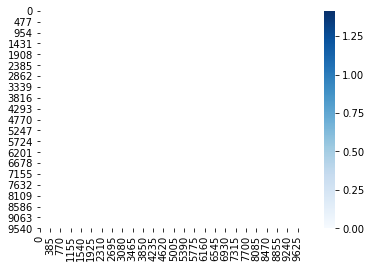

In [26]:
sns.heatmap(dist_matrix, cmap="Blues")
plt.show()

In [27]:
#Nominal Attribute

In [28]:
nominal=df[['Geography','Gender']]
nominal=(nominal.astype('category'))


In [29]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['Geography']=lb.fit_transform(nominal['Geography'])
nominal['Gender']=lb.fit_transform(nominal['Gender'])

In [30]:
nominal.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [31]:
nominal1=np.array(nominal)
nominal1.reshape(-1,2)
nominal2=np.array(nominal)
nominal2.reshape(-1,2)

array([[0, 0],
       [2, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 1],
       [0, 0]])

In [32]:
from scipy.spatial import distance
dist_matrix=distance.cdist(nominal1,nominal2)
print(dist_matrix)

[[0.         2.         0.         ... 0.         1.41421356 0.        ]
 [2.         0.         2.         ... 2.         1.41421356 2.        ]
 [0.         2.         0.         ... 0.         1.41421356 0.        ]
 ...
 [0.         2.         0.         ... 0.         1.41421356 0.        ]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 0.         1.41421356]
 [0.         2.         0.         ... 0.         1.41421356 0.        ]]


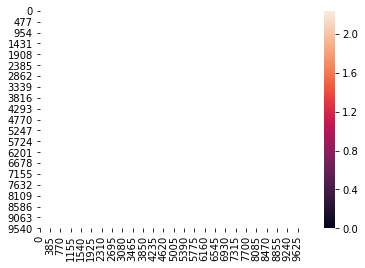

In [33]:
sns.heatmap(dist_matrix)
plt.show()

In [34]:
#Numeric Attributes

In [36]:
numeric=df[['CreditScore','Age','Tenure','CustomerId','Balance','EstimatedSalary']]
numeric.head()


,CreditScore,Age,Tenure,CustomerId,Balance,EstimatedSalary
0,619,42,2,15634602,0.00,101348.88
1,608,41,1,15647311,83807.86,112542.58
2,502,42,8,15619304,159660.80,113931.57
3,699,39,1,15701354,0.00,93826.63
4,850,43,2,15737888,125510.82,79084.10


In [38]:
num1=np.array(numeric[['Age','Tenure']])
num1.reshape(-1,2)
num1.shape

(10000, 2)

In [40]:
num2=np.array(numeric[['CreditScore','Balance']])
num2.reshape(-1,2)
num2.shape

(10000, 2)

In [41]:
from scipy.spatial import distance
dist_matrix=distance.cdist(num1,num2)
print(dist_matrix)

[[   577.00346619  83807.77127653 159659.46266175 ...    667.00299849
   75076.85911355 130142.9511031 ]
 [   578.00086505  83808.77801316 159660.46554185 ...    668.0007485
   75077.86879618 130143.95685319]
 [   577.05545661  83801.77141338 159653.46268666 ...    667.04797429
   75070.85939721 130136.95120274]
 ...
 [   583.0420225   83802.81212907 159654.48008258 ...    673.03640318
   75071.91793378 130137.98590313]
 [   577.00779891  83806.77129934 159658.4626659  ...    667.00674659
   75075.85916083 130141.95111971]
 [   591.01353622  83805.86704342 159657.50362022 ...    681.01174733
   75074.99664413 130141.03257107]]


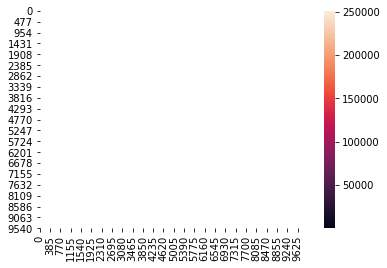

In [42]:
dist_matrix.shape
sns.heatmap(dist_matrix)